In [156]:
library(ggplot2)
library(RColorBrewer)
library(reshape2)
library(repr)
library(grid)

# CMI-Based Color Scheme
cmi_main_blue="#0071b2"
cmi_grey="#929d9e"
cmi_light_blue="#00c4d9"
cmi_pea_green="#b5bf00"

cmi_rich_green="#73933d"
cmi_rich_purple="#8e7fac"
cmi_rich_red="#d75920"
cmi_rich_blue="#4c87a1"
cmi_rich_aqua="#66c7c3"
cmi_rich_orange="#eebf42"

cmi_vibrant_yellow="#ffd457"
cmi_vibrant_orange="#f58025"
cmi_vibrant_green="#78a22f"
cmi_vibrant_garnet="#e6006f"
cmi_vibrant_purple="#9A4d9e"
cmi_vibrant_blue="#19398a"

cmi_site_colors = c(cmi_vibrant_blue,
                    cmi_rich_blue,
                    cmi_vibrant_purple,
                    cmi_vibrant_garnet,
                    cmi_rich_red,
                    cmi_vibrant_orange,
                    cmi_vibrant_yellow,
                    cmi_vibrant_green)
cmi_rich_colors= c(cmi_vibrant_blue,
                   cmi_vibrant_green,
                   cmi_vibrant_garnet,
                   cmi_vibrant_purple,
                   cmi_vibrant_yellow,
                   cmi_vibrant_orange)
cmi_site_colors_ramp = colorRampPalette(cmi_site_colors)


In [169]:
dl_counts=read.table("download_counts.csv",header=TRUE,sep=',',colClasses=c("Date","numeric"))
p1=ggplot(dl_counts,aes(Date,Downloads)) +
    geom_line() +
    scale_y_continuous(breaks=seq(0,1600,200)) +
    scale_x_date(limits=c(as.Date("2011-02-28"),as.Date("2016-02-29")),
                 breaks=seq(as.Date("2011-04-28"),as.Date("2016-02-29"),by="2 quarters"),
                 date_labels="%b %Y", expand=c(0.01,0.01)) +
    ylab("")+
    xlab("")+
    theme_bw()+
    theme(axis.title.x = element_text(family = "ArialMT", face = "plain", size=10)) +  
    theme(axis.title.y = element_text(family = "ArialMT", face = "plain",  size=10, vjust=0.75, angle = 90)) +  
    theme(axis.text.x = element_text(family = "ArialMT", face = "plain", size=8, vjust=0.95, hjust=1, angle=45)) + 
    theme(axis.text.y = element_text(family = "ArialMT", face = "plain",size=8, angle=0, hjust=0.5)) + 
    theme(axis.ticks.length = unit(.15, "lines")) + 
    theme(axis.ticks.margin = unit(.15,"lines")) + 
    theme(plot.margin       = unit(c(0, 0.25, 0, 0), "lines")) 

#scale_x_date(limits=c(as.Date("2011-04-30"),as.Date("2016-02-29"))) +

Warning message:
: `axis.ticks.margin` is deprecated. Please set `margin` property  of `axis.text` instead

In [92]:
pub_counts=read.csv("document_counts.csv",header=TRUE,sep=',')
pub_counts = melt(pub_counts, id.vars = "Year",
     measure.vars = c("In.Proceedings", "Journal","Master.s.Thesis","Patent","PhD.Dissertation","arXiv.E.print"))
head(pub_counts)

,Year,variable,value
1,2011,In.Proceedings,0
2,2012,In.Proceedings,3
3,2013,In.Proceedings,3
4,2014,In.Proceedings,2
5,2015,In.Proceedings,4
6,2011,Journal,0


In [168]:
p2=ggplot(pub_counts,aes(Year,value,fill=variable)) +
    geom_bar(position = "stack", stat="identity") +
    scale_fill_manual(values=cmi_rich_colors,
                      name="Publication Type",
                      labels=c("In Proceedings", "Journal", "Master's Thesis","Patent","PhD Dissertation","arXiv E-print"))+
    #guide_legend(title="Publication Type")+
    scale_y_continuous(breaks=seq(0,20,2))+
    ylab("")+
    xlab("")+
    theme_bw()+
    theme(axis.title.x = element_text(family = "ArialMT", face = "plain", size=10)) +  
    theme(axis.title.y = element_text(family = "ArialMT", face = "plain",  size=10, vjust=0.75, angle = 90)) +  
    theme(axis.text.x = element_text(family = "ArialMT", face = "plain", size=8, vjust=0.95, hjust=1, angle=45)) + 
    theme(axis.text.y = element_text(family = "ArialMT", face = "plain",size=8, angle=0, hjust=0.5)) + 
    theme(legend.text = element_text(family = "ArialMT", face = "plain", size=8))+
    theme(legend.title = element_text(family = "ArialMT", face = "plain", size=10))+
    theme(axis.ticks.length = unit(.15, "lines")) + 
    theme(axis.ticks.margin = unit(.15,"lines")) + 
    theme(plot.margin       = unit(c(0, 0.25, 0, 0), "lines")) 


Warning message:
: `axis.ticks.margin` is deprecated. Please set `margin` property  of `axis.text` instead

Warning message:
: Removed 1 rows containing missing values (geom_path).

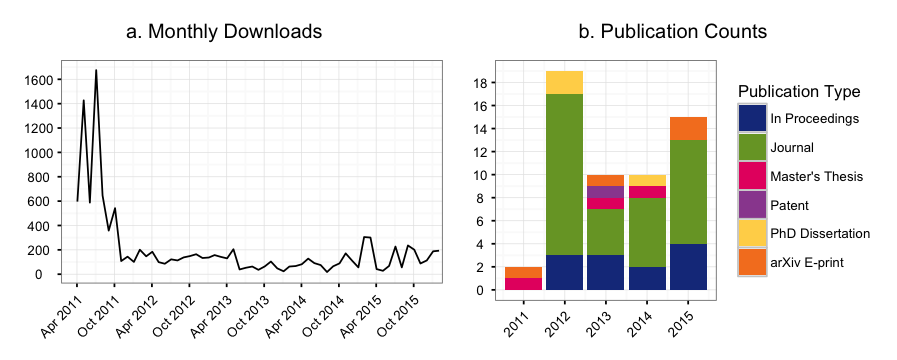

In [167]:
options(repr.plot.width=190/25.4,repr.plot.height=3)
grid.newpage()
layout = grid.layout(2, 2, heights=unit(c(1,5,1,5),"null"))

pushViewport(viewport(layout=layout))
grid.text('a. Monthly Downloads', vp=viewport(layout.pos.row=1,layout.pos.col=1), 
          gp=gpar(fontsize=12,fontfamily="ArialMT",fontface="bold"))
grid.text('b. Publication Counts', vp=viewport(layout.pos.row=1,layout.pos.col=2), 
          gp=gpar(fontsize=12,fontfamily="ArialMT",fontface="bold"))

print(p1, vp = viewport(layout.pos.row = 2, layout.pos.col = 1))
print(p2, vp = viewport(layout.pos.row = 2, layout.pos.col = 2))


In [170]:
pdf(file="impact_Stats.pdf",title="Impact Stats",width=190/25.4,height=3,family="ArialMT",paper="special")
grid.newpage()
layout = grid.layout(2, 2, heights=unit(c(1,5,1,5),"null"))

pushViewport(viewport(layout=layout))
grid.text('a. Monthly Downloads', vp=viewport(layout.pos.row=1,layout.pos.col=1), 
          gp=gpar(fontsize=12,fontfamily="ArialMT",fontface="bold"))
grid.text('b. Publication Counts', vp=viewport(layout.pos.row=1,layout.pos.col=2), 
          gp=gpar(fontsize=12,fontfamily="ArialMT",fontface="bold"))

print(p1, vp = viewport(layout.pos.row = 2, layout.pos.col = 1))
print(p2, vp = viewport(layout.pos.row = 2, layout.pos.col = 2))
dev.off()

Warning message:
: Removed 1 rows containing missing values (geom_path).

pdf 
  2